In [30]:
##KIVA Case study - Tutorial for MMAI 891 NLP 

In [31]:
import datetime
print(datetime.datetime.now())

2020-05-11 14:51:00.586029


In [32]:
#import urllib.request
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
#from urllib.request import urlopen
#url = "https://raw.githubusercontent.com/stepthom/sandbox/master/data/kiva_cleaned.csv"
#resource = urlopen(url)
#kiva_cleaned =  resource.read().decode("utf-8")
#print(type(kiva_cleaned))
#print(kiva_cleaned[0:200])
#came in as a string, so found some other code...

In [34]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stepthom/sandbox/master/data/kiva_cleaned.csv'
kiva_df = pd.read_csv(url, error_bad_lines=False)

In [35]:
kiva_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_id      6818 non-null   int64  
 1   status       6818 non-null   object 
 2   sector       6818 non-null   object 
 3   en           6818 non-null   object 
 4   country      6818 non-null   object 
 5   gender       6818 non-null   object 
 6   loan_amount  6818 non-null   float64
 7   nonpayment   6818 non-null   object 
 8   en_clean     6802 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 479.5+ KB


In [36]:
kiva_df = kiva_df.dropna()
#dropping blank rows
kiva_df = kiva_df.reset_index(drop=True)
#resetting the index after dropping blank rows
kiva_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6802 entries, 0 to 6801
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_id      6802 non-null   int64  
 1   status       6802 non-null   object 
 2   sector       6802 non-null   object 
 3   en           6802 non-null   object 
 4   country      6802 non-null   object 
 5   gender       6802 non-null   object 
 6   loan_amount  6802 non-null   float64
 7   nonpayment   6802 non-null   object 
 8   en_clean     6802 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 478.4+ KB


In [37]:
kiva_df.shape

(6802, 9)

In [38]:
kiva_df.head()

,loan_id,status,sector,en,country,gender,loan_amount,nonpayment,en_clean
0,0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender,"Robert, 40, is married and has 6 children. In ..."
1,1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender,"Petronilla, 30, was deserted by her husband an..."
2,2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender,"Tom Mung'ahu, 45, is married and has 6 childre..."
3,3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender,"Benedina, 42, is married and has 4 girls. In a..."
4,4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender,"Vincent Ondego 40, is married and has 8 childr..."


In [39]:
kiva_df.tail()

,loan_id,status,sector,en,country,gender,loan_amount,nonpayment,en_clean
6797,7983,paid,Clothing,Rosa is a member of the 3 de Mayo Communal Ban...,Ecuador,F,1050.0,lender,Rosa is a member of the 3 de Mayo Communal Ban...
6798,7984,paid,Agriculture,"The communal bank, ""Cumbe,"" is located on the ...",Ecuador,F,2650.0,partner,"The communal bank, ""Cumbe,"" is located on the ..."
6799,7985,paid,Food,Gladys Burgos Macas is a member of the 3 de Ma...,Ecuador,F,775.0,partner,Gladys Burgos Macas is a member of the 3 de Ma...
6800,7986,paid,Retail,The Communal Bank <em>Las Caleras</em> is loca...,Ecuador,F,275.0,partner,The Communal Bank Las Caleras is located in th...
6801,7987,paid,Services,Eliud Ouma owns the Purple Hut salon located o...,Kenya,M,275.0,partner,Eliud Ouma owns the Purple Hut salon located o...


In [40]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import unidecode

In [41]:
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))
lemmer = WordNetLemmatizer()

In [42]:
def preprocess(x):
    #lowercase everything
    x = x.lower()
    
    #remove punctuation by removing anything that not a word or white space
    x = re.sub(r'[^\w\s]','', x)
    
    #remove weird characters like umlots
    x = unidecode.unidecode(x)
    
    #remove numbers and replace with nothing
    x = re.sub(r'\d+','', x)
               
    #lemmatize words
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    
    #remove stop words - combined into above so not multiple lists
    #x = [w for w in x.split() if w not in stop_words]
               
    #x is now list, so need to join it
    return ' '.join(x)
               
kiva_df['en_clean_pre'] = kiva_df['en_clean'].apply(preprocess)
    

In [43]:
kiva_df.head()

,loan_id,status,sector,en,country,gender,loan_amount,nonpayment,en_clean,en_clean_pre
0,0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender,"Robert, 40, is married and has 6 children. In ...",robert married child addition family take care...
1,1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender,"Petronilla, 30, was deserted by her husband an...",petronilla deserted husband responsible upbrin...
2,2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender,"Tom Mung'ahu, 45, is married and has 6 childre...",tom mungahu married child child attending elem...
3,3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender,"Benedina, 42, is married and has 4 girls. In a...",benedina married girl addition family also tak...
4,4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender,"Vincent Ondego 40, is married and has 8 childr...",vincent ondego married child beside family vin...


In [45]:
kiva_df.iloc[0,:].en_clean

'Robert, 40, is married and has 6 children. In addition to his family of 8, he takes care of his mother and 5 brothers. Robert started by planting vegetables and selling at the local market. He then diversified with a tea nursery which is more profitable. Given a loan of $500, Robert will be able to improve his activities by buying fertilizers, pesticides, a pump and seedlings. The pump will remove the uncertainties of the weather. The current capital in his venture is Ksh 10500 or $150, which does not allow Robert to maximize his potential. Robert completed high school and has never got employment. He got apprentice training from a tea extension officer. He is a go getter, and his main hobby is teaching music.'

In [46]:
kiva_df.iloc[0,:].en_clean_pre

'robert married child addition family take care mother brother robert started planting vegetable selling local market diversified tea nursery profitable given loan robert able improve activity buying fertilizer pesticide pump seedling pump remove uncertainty weather current capital venture ksh allow robert maximize potential robert completed high school never got employment got apprentice training tea extension officer go getter main hobby teaching music'

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

#max_df means word has to be in less than 50% of docs, min_df is min percent docs the word is in, max_features is the max number of words found, ngram_range is the size of ngrams
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 0.05, max_features = 1000, ngram_range=[1,3])
#creating document term matrix
dtm = vectorizer.fit_transform(kiva_df['en_clean_pre'])

In [49]:
dtm.shape

(6802, 270)

In [50]:
vectorizer.get_feature_names()

['able',
 'active',
 'active member',
 'activity',
 'add',
 'additional',
 'age',
 'ago',
 'allow',
 'also',
 'always',
 'amount',
 'another',
 'applied',
 'applied loan',
 'area',
 'attend',
 'back',
 'basic',
 'bean',
 'began',
 'belief',
 'better',
 'born',
 'bought',
 'boy',
 'business selling',
 'buy',
 'buying',
 'capital',
 'care',
 'cement',
 'child school',
 'childrens',
 'church',
 'city',
 'client',
 'clothes',
 'clothing',
 'college',
 'community',
 'continue',
 'cost',
 'could',
 'cow',
 'currently',
 'customer',
 'dairy',
 'dairy cow',
 'daughter',
 'day',
 'decided',
 'demand',
 'different',
 'domingo',
 'dominican',
 'dream',
 'due',
 'earn',
 'educate',
 'education',
 'enable',
 'enough',
 'entrepreneur',
 'every',
 'every day',
 'expand',
 'expand business',
 'expense',
 'experience',
 'explains',
 'family',
 'farm',
 'farmer',
 'farming',
 'father',
 'fee',
 'feed',
 'first',
 'first loan',
 'five',
 'five child',
 'food',
 'four',
 'four child',
 'friend',
 'fruit',

In [52]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 20, doc_topic_prior = None, 
                                      max_iter = 200, learning_method='batch', random_state=123, n_jobs=2, 
                                     verbose=0)
lda_output = lda_model.fit(dtm)

-223624.9600985085

In [54]:
# Import the wordcloud library
from wordcloud import WordCloud

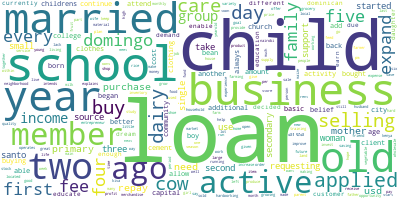

In [61]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Join the different processed titles together.
long_string = ','.join(vectorizer.get_feature_names())
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [62]:
#approximate log likelyhood, higher values, better
lda_output.score(dtm)

-223624.9600985085

In [63]:
#perplexity score, lower is better
lda_output.perplexity(dtm)

540.6440129012268

In [64]:
theta = pd.DataFrame(lda_model.transform(dtm))

In [65]:
theta.head()
#columns are topics, rows are documents, this shows first 5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.008651,0.008651,0.008651,0.008651,0.483942,0.008651,0.008651,0.008651,0.008651,0.008651,0.008651,0.008651,0.360335,0.008651,0.008651,0.008651,0.008651,0.008651,0.008651,0.008651
1,0.007398,0.007398,0.007398,0.007398,0.007398,0.859442,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398,0.007398
2,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.008250,0.658675,0.192827,0.008250,0.008250
3,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.804310,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299,0.010299
4,0.821479,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396,0.009396


In [66]:
#how much each word is in each topic
beta = pd.DataFrame(lda_model.components_)

In [67]:
beta.head()
#words are columns, topics are rows

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,28.450467,55.671889,49.078044,20.139093,10.131653,2.238602,4.844017,20.392001,0.379399,32.240180,...,75.758588,19.303593,8.688853,12.839707,11.922191,21.248398,27.594151,33.102967,0.050000,13.793507
1,12.547361,0.050000,0.050000,0.050000,0.050000,0.050000,0.314016,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,2.543769,0.050000
2,12.299628,24.208785,22.185490,7.702309,4.612913,2.409955,3.894666,6.478088,0.479245,19.723512,...,24.990815,4.740272,4.946245,6.660111,5.612970,6.710831,13.696085,16.584664,0.050000,4.169932
3,38.018599,0.625488,0.050000,12.383906,2.379312,8.130464,42.873529,5.346212,12.875778,22.203624,...,5.003734,19.526729,13.453686,26.031663,14.001482,3.809130,13.377419,0.050000,13.818494,20.742405
4,31.489722,8.511836,8.250891,1.976989,1.115150,1.790282,2.074560,2.987586,0.050000,23.104390,...,1.604420,6.378504,2.433041,1.958979,0.050000,3.182817,2.796047,1.714359,1.312406,6.922944


In [69]:
feature_names = vectorizer.get_feature_names()
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = ' '.join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
    
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), 'Terms':termss})

In [70]:
topic_summary

,TopicID,Terms
0,0,group member usd woman group woman school
1,1,fee school fee pay school expand expand business
2,2,cow dairy milk dairy cow group farming
3,3,group life small member hope dominican
4,4,stock primary school able primary school increase
5,5,school requesting requesting loan family buy lack
6,6,expand expand business father family main living
7,7,farming maize land farmer farm bean
8,8,santo domingo santo domingo store community hu...
9,9,kenya service community yearold applied expand
